In [1]:
import pandas as pd

In [2]:

sales_data = pd.read_csv('doordash powers sales.csv')

In [3]:
sales_data.head()

,Granularity,Start Date,End Date,Store Name,Store ID,Business ID,Merchant Supplied ID,Gross Sales,Total Orders Including Cancelled Orders,Total Delivered or Picked Up Orders,AOV,Total Commission,Total Promotion Fees | (for historical reference only),Total Promotion Sales | (for historical reference only),Total Ad Fees | (for historical reference only),Total Ad Sales | (for historical reference only),Currency
0,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (12008-CROSS KEYS),946236,5579,12008,6108.26,286,286,21.36,718.48,780.30,2555.06,117.13,571.85,USD
1,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (1447-LINDNWLD-W HORSE),657157,5579,1447,17584.89,853,850,20.62,1979.54,3347.61,16204.37,225.93,996.84,USD
2,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (18170-NO WOODBURY),946241,5579,18170,12331.71,553,553,22.30,1452.07,1532.86,5296.64,165.10,748.21,USD
3,Week of 2025-07-28,2025-07-28,2025-08-03,McDonald's (18576-WINSLOW),946252,5579,18576,10593.44,502,499,21.10,1378.87,1000.04,3194.38,130.77,597.89,USD
4,Week of 2025-07-28,2025-07-28,2025-08-03,"McDonald's (21452 - RT 545, BROWNS MILLS)",1544237,5579,21452,10963.16,463,460,23.68,1311.95,900.86,2863.32,141.12,711.63,USD


In [4]:
sales_data.columns

Index(['Granularity', 'Start Date', 'End Date', 'Store Name', 'Store ID',
       'Business ID', 'Merchant Supplied ID', 'Gross Sales',
       'Total Orders Including Cancelled Orders',
       'Total Delivered or Picked Up Orders', 'AOV', 'Total Commission',
       'Total Promotion Fees | (for historical reference only)',
       'Total Promotion Sales | (for historical reference only)',
       'Total Ad Fees | (for historical reference only)',
       'Total Ad Sales | (for historical reference only)', 'Currency'],
      dtype='object')

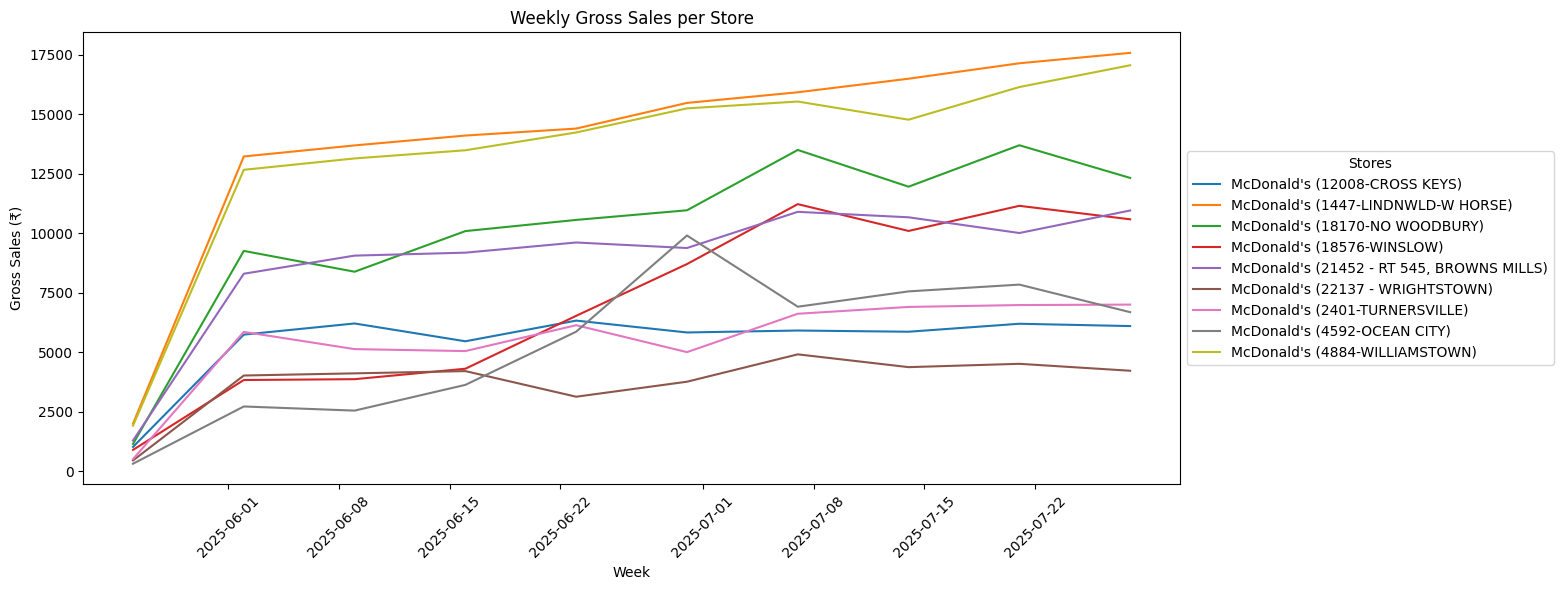

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your sales data
df = pd.read_csv("doordash powers sales.csv")  # or Excel

# Parse dates
df['Start Date'] = pd.to_datetime(df['Start Date'])

# Create 'Week' column
df['Week'] = df['Start Date'].dt.to_period('W').apply(lambda r: r.start_time)

# Group by Store and Week
weekly = df.groupby(['Store Name', 'Week']).agg({
    'Gross Sales': 'sum',
    'Total Orders Including Cancelled Orders': 'sum',
    'Total Delivered or Picked Up Orders': 'sum',
    'AOV': 'mean',
    'Total Commission': 'sum',
    'Total Promotion Fees | (for historical reference only)': 'sum',
    'Total Ad Fees | (for historical reference only)': 'sum'
}).reset_index()

# Plot Gross Sales per Store per Week
plt.figure(figsize=(12, 6))

for store in weekly['Store Name'].unique():
    data = weekly[weekly['Store Name'] == store]
    plt.plot(data['Week'], data['Gross Sales'], label=store)

plt.title("Weekly Gross Sales per Store")
plt.xlabel("Week")
plt.ylabel("Gross Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()

# Move legend to the right side
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Stores")

plt.show()



Cancellation Rate Pivot:
 Week                                       2025-05-26  2025-06-02  2025-06-09  \
Store Name                                                                      
McDonald's (12008-CROSS KEYS)                     0.0    0.000000    0.003322   
McDonald's (1447-LINDNWLD-W HORSE)                0.0    0.003030    0.001490   
McDonald's (18170-NO WOODBURY)                    0.0    0.000000    0.000000   
McDonald's (18576-WINSLOW)                        0.0    0.000000    0.000000   
McDonald's (21452 - RT 545, BROWNS MILLS)         0.0    0.010724    0.002347   
McDonald's (22137 - WRIGHTSTOWN)                  0.0    0.011561    0.000000   
McDonald's (2401-TURNERSVILLE)                    0.0    0.000000    0.008333   
McDonald's (4592-OCEAN CITY)                      0.0    0.008929    0.000000   
McDonald's (4884-WILLIAMSTOWN)                    0.0    0.001704    0.001704   

Week                                       2025-06-16  2025-06-23  2025-06-30  \


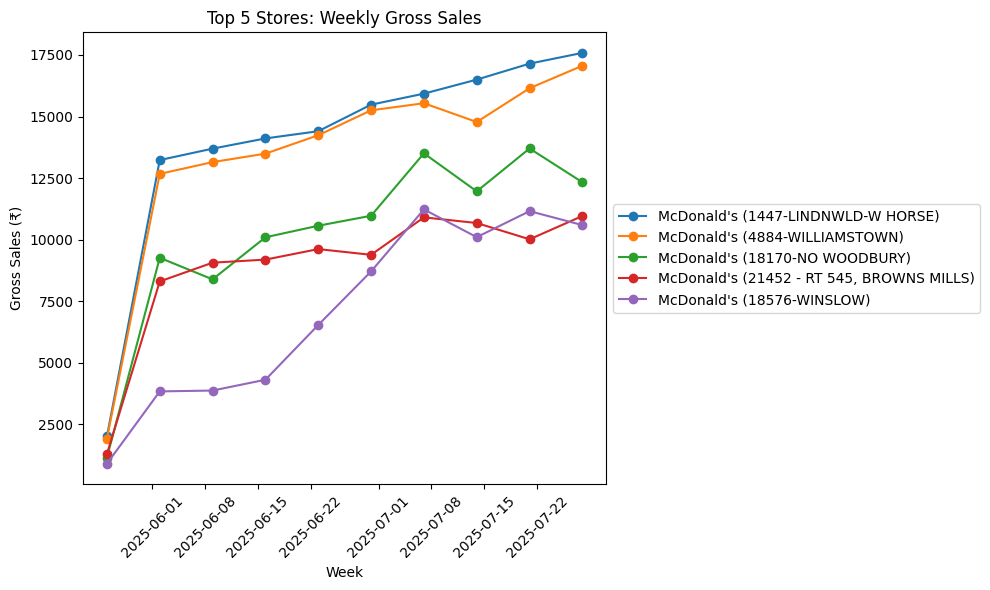

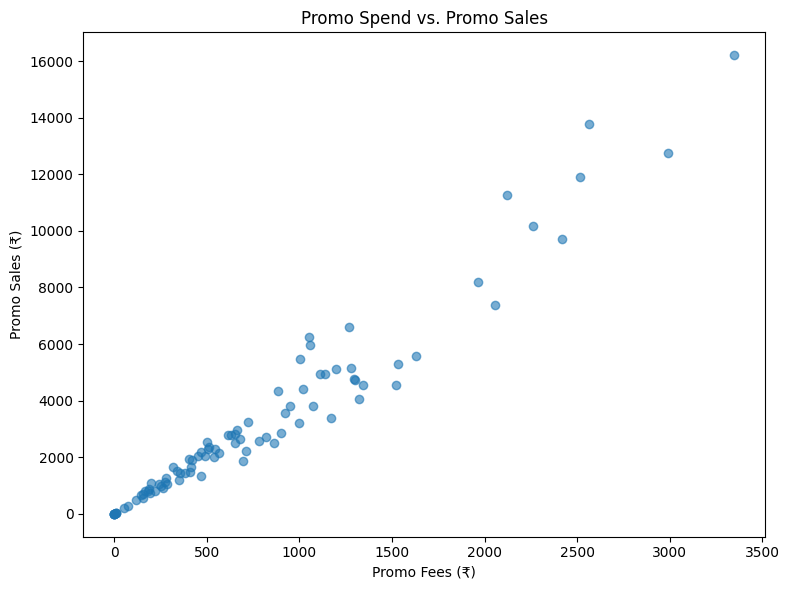

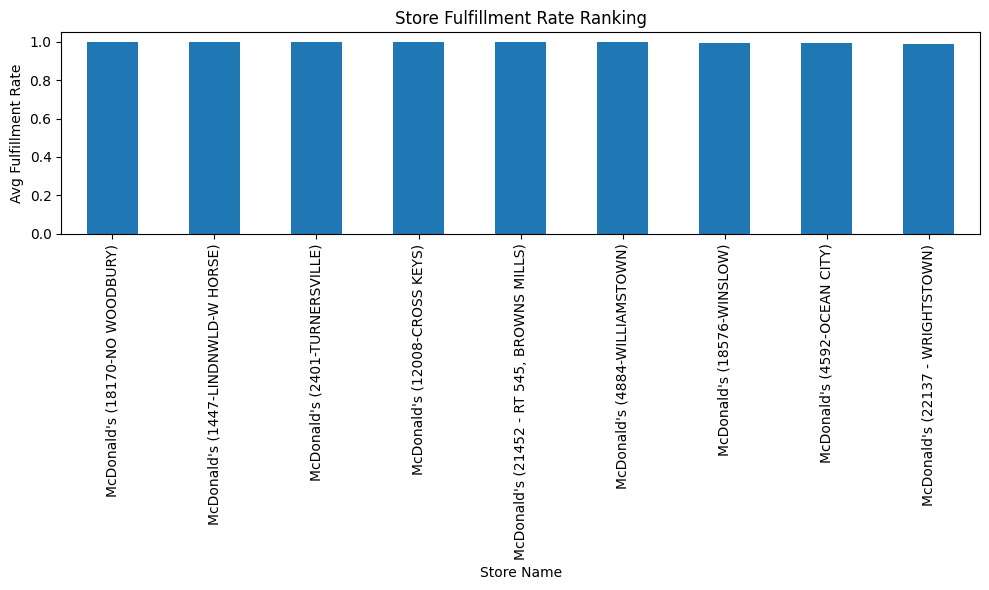

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load your data
# Replace with the correct path / filename
df = pd.read_csv("doordash powers sales.csv", parse_dates=["Start Date", "End Date"])

# 2. Create a Week column (using the Monday of each week)
df['Week'] = df['Start Date'].dt.to_period('W').apply(lambda r: r.start_time)

# 3. Compute new metrics
df = df.assign(
    # cancellation + fulfillment
    Cancellation_Rate = (
        (df['Total Orders Including Cancelled Orders'] 
         - df['Total Delivered or Picked Up Orders'])
        / df['Total Orders Including Cancelled Orders']
    ),
    Fulfillment_Rate = (
        df['Total Delivered or Picked Up Orders'] 
        / df['Total Orders Including Cancelled Orders']
    ),
    # commission + promo + ad ROI
    Commission_Rate = df['Total Commission'] / df['Gross Sales'],
    Promo_ROI = df['Total Promotion Sales | (for historical reference only)'] 
                / df['Total Promotion Fees | (for historical reference only)'],
    Ad_ROI = df['Total Ad Sales | (for historical reference only)'] 
             / df['Total Ad Fees | (for historical reference only)'],
    # per-order revenue
    Revenue_per_Delivered = df['Gross Sales'] / df['Total Delivered or Picked Up Orders']
)

# 4. Aggregate week-store level
weekly = df.groupby(['Store Name', 'Week']).agg({
    'Gross Sales': 'sum',
    'Total Orders Including Cancelled Orders': 'sum',
    'Total Delivered or Picked Up Orders': 'sum',
    'AOV': 'mean',
    'Cancellation_Rate': 'mean',
    'Fulfillment_Rate': 'mean',
    'Commission_Rate': 'mean',
    'Promo_ROI': 'mean',
    'Ad_ROI': 'mean',
    'Revenue_per_Delivered': 'mean'
}).reset_index()

# 5. Pivot table: stores × weeks for Cancellation Rate
cancel_pivot = weekly.pivot(index='Store Name', columns='Week', values='Cancellation_Rate')
print("\nCancellation Rate Pivot:\n", cancel_pivot)

# 6. Example Plot: Top 5 stores by total Gross Sales
totals = weekly.groupby('Store Name')['Gross Sales'].sum().nlargest(5)
top5 = totals.index.tolist()

plt.figure(figsize=(10, 6))
for store in top5:
    d = weekly[weekly['Store Name'] == store]
    plt.plot(d['Week'], d['Gross Sales'], marker='o', label=store)

plt.title("Top 5 Stores: Weekly Gross Sales")
plt.xlabel("Week")
plt.ylabel("Gross Sales (₹)")
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()
plt.show()

# 7. Scatter: Promo Fees vs. Promo Sales (to check ROI dispersion)
plt.figure(figsize=(8, 6))
plt.scatter(
    df['Total Promotion Fees | (for historical reference only)'],
    df['Total Promotion Sales | (for historical reference only)'],
    alpha=0.6
)
plt.xlabel("Promo Fees (₹)")
plt.ylabel("Promo Sales (₹)")
plt.title("Promo Spend vs. Promo Sales")
plt.tight_layout()
plt.show()

# 8. Bar: Average Fulfillment Rate by Store
fulfill_avg = weekly.groupby('Store Name')['Fulfillment_Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
fulfill_avg.plot(kind='bar')
plt.ylabel("Avg Fulfillment Rate")
plt.title("Store Fulfillment Rate Ranking")
plt.tight_layout()
plt.show()
